### Prepare dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from xgboost import XGBRegressor
from sklearn.externals import joblib
import copy 
import pickle
import os
from pprint import pprint
import math
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\xiao\anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data = pd.read_csv('price_data_with_filtered_neighbors_NYC_11_30.csv')
data.dtypes

host_identity_verified                           object
bedrooms                                        float64
neighbourhood_cleansed                           object
calculated_host_listings_count_shared_rooms       int64
host_total_listings_count                       float64
neighbourhood_group_cleansed                     object
has_availability                                 object
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_entire_homes       int64
maximum_nights_avg_ntm                          float64
maximum_nights                                    int64
accommodates                                      int64
host_is_superhost                                object
availability_365                                  int64
minimum_nights_avg_ntm                          float64
price                                           float64
instant_bookable                                 object
bathrooms                                       

In [3]:
data.shape

(35564, 18)

In [4]:
data_with_filtered_neighbors = copy.deepcopy(data.dropna(axis=0,how='any'))
data_with_filtered_neighbors.drop(data_with_filtered_neighbors[data_with_filtered_neighbors['price']>1000].index,inplace = True)
data_with_filtered_neighbors.price = data_with_filtered_neighbors.price.apply(np.log1p)
data_with_filtered_neighbors.shape

(31339, 18)

(array([6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        1.100e+01, 2.500e+01, 2.800e+01, 9.000e+01, 7.800e+01, 2.800e+02,
        2.830e+02, 5.640e+02, 8.660e+02, 8.590e+02, 6.480e+02, 1.225e+03,
        1.921e+03, 1.010e+03, 1.331e+03, 1.277e+03, 1.520e+03, 1.137e+03,
        2.075e+03, 1.007e+03, 1.316e+03, 1.534e+03, 9.870e+02, 1.904e+03,
        1.239e+03, 1.136e+03, 1.366e+03, 7.720e+02, 9.120e+02, 5.730e+02,
        7.180e+02, 3.960e+02, 4.530e+02, 4.140e+02, 1.800e+02, 2.280e+02,
        2.400e+02, 9.500e+01, 1.420e+02, 9.900e+01, 1.050e+02, 9.200e+01,
        8.300e+01, 1.080e+02]),
 array([2.39789527, 2.48811246, 2.57832965, 2.66854684, 2.75876403,
        2.84898122, 2.93919841, 3.0294156 , 3.11963279, 3.20984998,
        3.30006717, 3.39028436, 3.48050155, 3.57071874, 3.66093593,
        3.75115312, 3.84137031, 3.93158751, 4.0218047 , 4.11202189,
        4.20223908, 4.29245627, 4.38267346, 4.47289065, 4.56310784,
        4.65332503, 4.74354222, 4.83

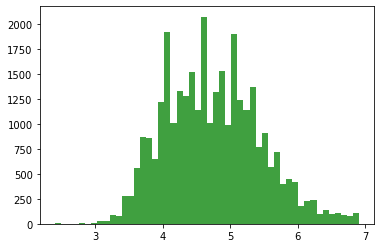

In [5]:
plt.hist(data_with_filtered_neighbors.price, 50, facecolor='g', alpha=0.75)

In [6]:
## One Hot Encoding for Categorical Features, usually used in ml
listings_processed = pd.get_dummies(data_with_filtered_neighbors)
listings_processed.shape

(31339, 114)

In [15]:
## Split train and test data and remember to fix this in multi vars
listings_processed = shuffle(listings_processed)
# Extract features and labels
y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)
# Training and Testing Sets
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((23504, 113), (7835, 113))

In [57]:
import pickle
tuple_objects = ( train_X, test_X, train_y,test_y)
# Save tuple
pickle.dump(tuple_objects, open("train_test_data_with_filtered_neighbors.pkl", 'wb'))
# Restore tuple
# train_X, test_X, train_y,test_y = pickle.load(open("train_test_data_with_filtered_neighbors.pkl", 'rb'))

In [9]:
# Evaluation functions
def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("MAE: " + str(round(median_absolute_error(predictions, evaluate_set), 4))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 4)
    print("RMSE: " + str(RMSE))

### Linear Reg

In [21]:
from sklearn.linear_model import LinearRegression
pipeline_LR = make_pipeline(SimpleImputer(), StandardScaler(),LinearRegression())
pipeline_LR.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(pipeline_LR, test_X, test_y)
print('Validation for train data')
evaluate_model(pipeline_LR, train_X, train_y)

Evaluation for test data
MAE: 0.2926
RMSE: 0.4705
Validation for train data
MAE: 0.2904
RMSE: 0.4612


### Random Forest

In [22]:
# Use default paras
pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),RandomForestRegressor(random_state=99,n_jobs=-1))
pipeline_RF.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(pipeline_RF, test_X, test_y)
print('Validation for train data')
evaluate_model(pipeline_RF, train_X, train_y)


Evaluation for test data
MAE: 0.1972
RMSE: 0.3915
Validation for train data
MAE: 0.0856
RMSE: 0.1814


In [23]:
importances = pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False)

,feature,importance
3,calculated_host_listings_count_private_rooms,0.337198
7,accommodates,0.113830
10,bathrooms,0.065864
105,neighbourhood_group_cleansed_Manhattan,0.064503
8,availability_365,0.063665
...,...,...
72,neighbourhood_cleansed_Ozone Park,0.000175
15,neighbourhood_cleansed_Battery Park City,0.000111
69,neighbourhood_cleansed_Mott Haven,0.000105
31,neighbourhood_cleansed_Corona,0.000077


In [24]:
pipeline_RF.predict(test_X)

array([4.31389959, 5.15641057, 4.9597034 , ..., 3.90928113, 3.94209225,
       4.32165593])

In [25]:
test_y

array([4.46590812, 5.01063529, 5.04985601, ..., 4.2341065 , 3.71357207,
       3.71357207])

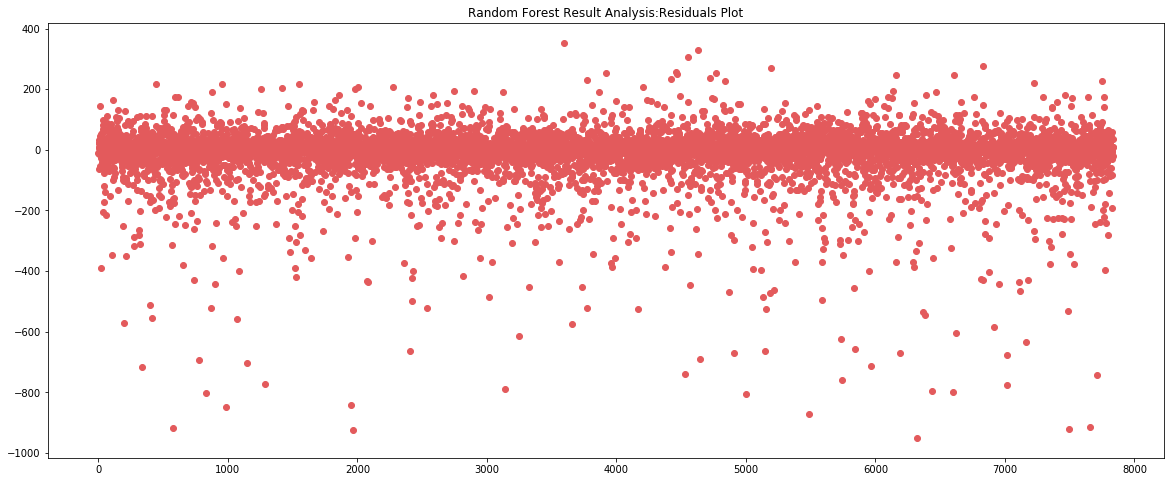

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 8))
plt.title('Random Forest Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(pipeline_RF.predict(test_X))-np.expm1(test_y), color='#E35A5C', label='residuals')

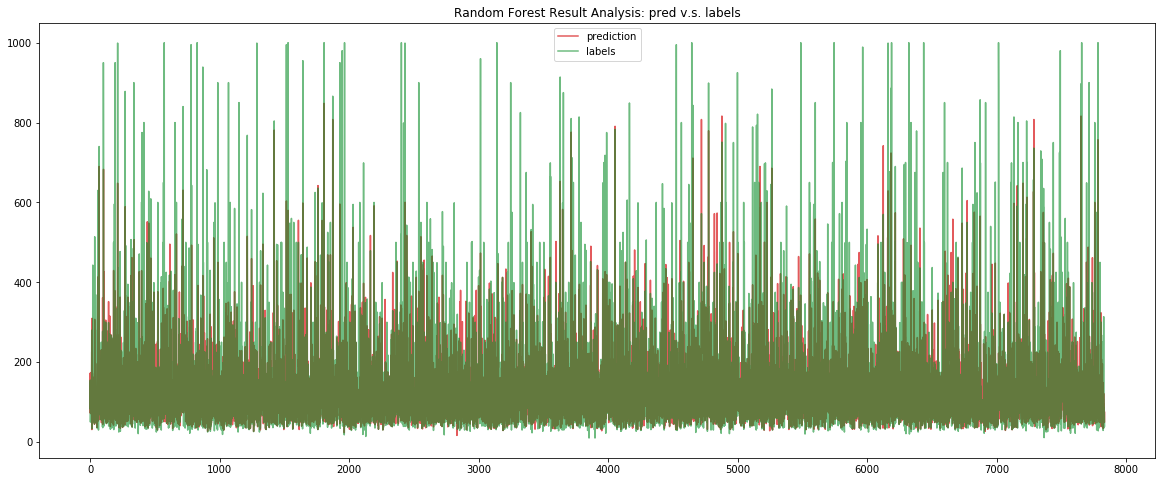

In [28]:
plt.figure(figsize=(20, 8))
plt.title('Random Forest Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(pipeline_RF.predict(test_X)), color='#E35A5C', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [29]:
### Tune hyperparametres
print('Parameters currently used:\n')
pprint(pipeline_RF.get_params())

Parameters currently used:

{'memory': None,
 'randomforestregressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=99, verbose=0, warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestre

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipeline_RF, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 2, verbose=1,
                               random_state = 99, n_jobs = -1, 
                               scoring = 'neg_root_mean_squared_error')
# Fit our model
rf_random.fit(train_X, train_y)
rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished


{'randomforestregressor__n_estimators': 560,
 'randomforestregressor__min_samples_split': 20,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__max_depth': 110,
 'randomforestregressor__bootstrap': False}

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [False],
    'randomforestregressor__max_depth': [70, 110, 150], 
    'randomforestregressor__max_features': ['sqrt'],
    'randomforestregressor__min_samples_leaf': [1],
    'randomforestregressor__min_samples_split': [10, 20, 40],
    'randomforestregressor__n_estimators': [100, 300, 560,800,1000] 
}

grid_search = GridSearchCV(estimator = pipeline_RF, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_root_mean_squared_error')

grid_search.fit(train_X, train_y)
grid_search.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.3min finished


{'randomforestregressor__bootstrap': False,
 'randomforestregressor__max_depth': 70,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__n_estimators': 1000}

In [38]:
my_pipeline_RF_grid = make_pipeline(SimpleImputer(), StandardScaler(),
                                      RandomForestRegressor(random_state=99,
                                                            n_jobs=-1,
                                                            bootstrap = False,
                                                            max_depth = 70,
                                                            max_features = 'sqrt',
                                                            min_samples_leaf = 1,
                                                            min_samples_split = 10,
                                                            n_estimators = 1000))

my_pipeline_RF_grid.fit(train_X, train_y)
evaluate_model(my_pipeline_RF_grid, test_X, test_y)

MAE: 0.1979
RMSE: 0.381


In [39]:
evaluate_model(my_pipeline_RF_grid, train_X, train_y)

MAE: 0.126
RMSE: 0.2354


In [40]:
importances = pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False)
feature_importances.to_csv('C:\\Users\\xiao\\Documents\\result_summary\\rf\\feature_importances_untuned.csv',index =False )

In [41]:
importances = my_pipeline_RF_grid.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False)
feature_importances.to_csv('C:\\Users\\xiao\\Documents\\result_summary\\rf\\feature_importances_tuned.csv',index =False )

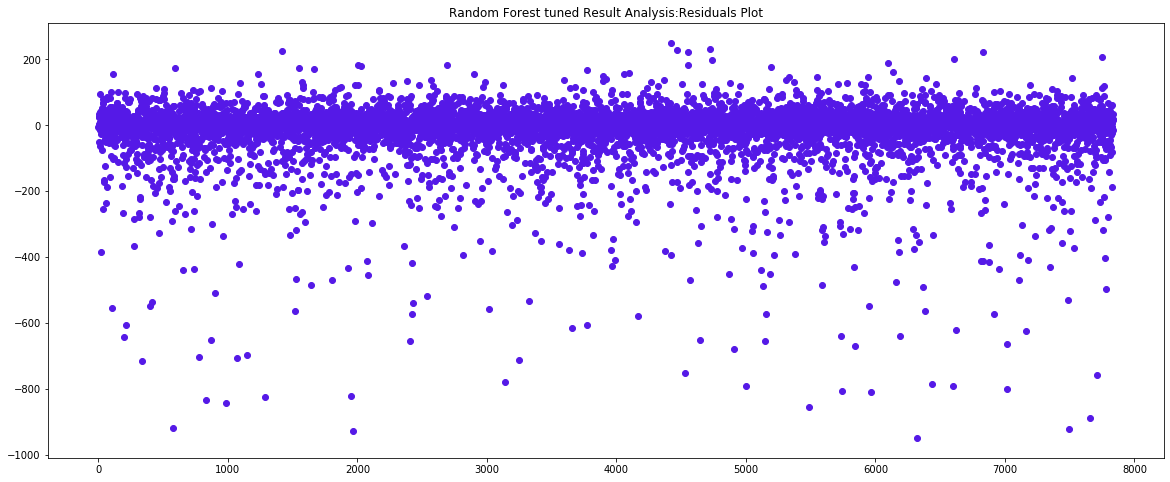

In [42]:
plt.figure(figsize=(20, 8))
plt.title('Random Forest tuned Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(my_pipeline_RF_grid.predict(test_X))-np.expm1(test_y), color='#5519E7', label='residuals')

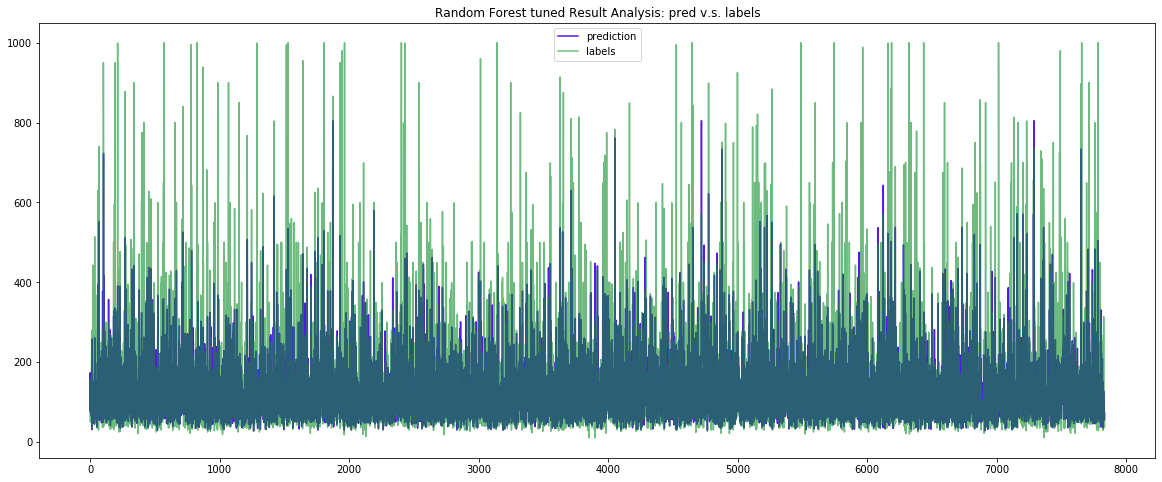

In [43]:
plt.figure(figsize=(20, 8))
plt.title('Random Forest tuned Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(my_pipeline_RF_grid.predict(test_X)), color='#5519E7', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [44]:
with open('C:\\Users\\xiao\\Documents\\result_summary\\rf\\my_pipeline_RF_grid.pickle', 'wb') as f:
    pickle.dump(my_pipeline_RF_grid, f)
# joblib.dump(my_pipeline_RF_grid,"C:\\Users\\xiao\\Documents\\result_summary\\rf\\my_pipeline_RF_grid.pkl")

### XGBoost

In [45]:
# Use default paras
pipeline_xgb = make_pipeline(SimpleImputer(), StandardScaler(),XGBRegressor(random_state=99))
pipeline_xgb.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(pipeline_xgb, test_X, test_y)
print('Validation for train data')
evaluate_model(pipeline_xgb, train_X, train_y)

Evaluation for test data
MAE: 0.2058
RMSE: 0.3806
Validation for train data
MAE: 0.1792
RMSE: 0.3229


In [46]:
importances = pipeline_xgb.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})

In [47]:
feature_importances.to_csv('C:\\Users\\xiao\\Documents\\result_summary\\xgb\\feature_importances_untuned.csv',index =False )

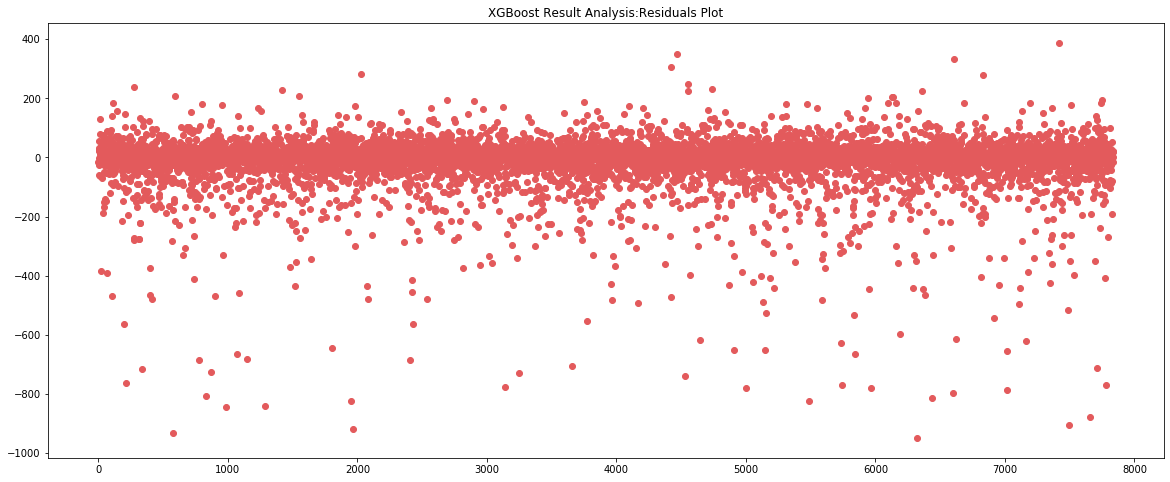

In [48]:
plt.figure(figsize=(20, 8))
plt.title('XGBoost Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(pipeline_xgb.predict(test_X))-np.expm1(test_y), color='#E35A5C', label='residuals')

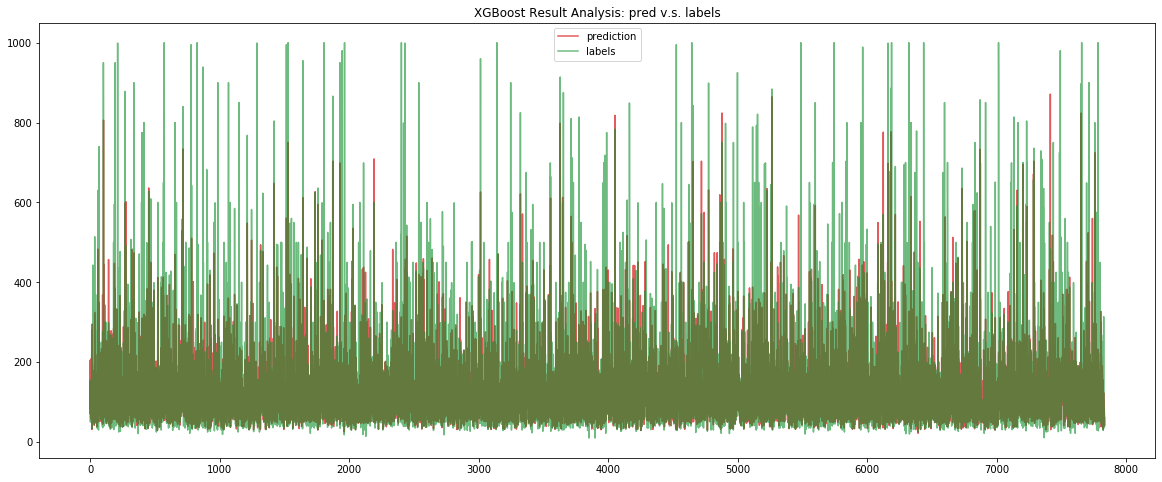

In [49]:
plt.figure(figsize=(20, 8))
plt.title('XGBoost Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(pipeline_xgb.predict(test_X)), color='#E35A5C', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [50]:
print('Parameters currently used:\n')
pprint(pipeline_xgb.get_params())

Parameters currently used:

{'memory': None,
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'mean',
 'simpleimputer__verbose': 0,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('simpleimputer',
            SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)),
           ('standardscaler',
            StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('xgbregressor',
            XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_b

In [51]:
param_grid = {'xgbregressor__learning_rate': [0.3,0.2, 0.1, 0.05, 0.01], 
              'xgbregressor__max_depth': [3,6,9,12],
              'xgbregressor__n_estimators': [50,100, 500, 1000]}

grid_search_xgb = GridSearchCV(estimator = pipeline_xgb,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 1, 
                           scoring = 'neg_root_mean_squared_error')

grid_search_xgb.fit(train_X, train_y)
grid_search_xgb.best_params_


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 13.5min finished


{'xgbregressor__learning_rate': 0.2,
 'xgbregressor__max_depth': 3,
 'xgbregressor__n_estimators': 1000}

In [52]:
my_pipeline_xgb_grid = make_pipeline(SimpleImputer(), StandardScaler(),XGBRegressor(random_state=99,learning_rate = 0.2,max_depth=3,n_estimators=1000))
my_pipeline_xgb_grid.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(my_pipeline_xgb_grid, test_X, test_y)
print('Validation for train data')
evaluate_model(my_pipeline_xgb_grid, train_X, train_y)

Evaluation for test data
MAE: 0.2043
RMSE: 0.3776
Validation for train data
MAE: 0.1817
RMSE: 0.3272


In [53]:
importances = my_pipeline_xgb_grid.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.to_csv('C:\\Users\\xiao\\Documents\\result_summary\\xgb\\feature_importances_tuned.csv',index =False )

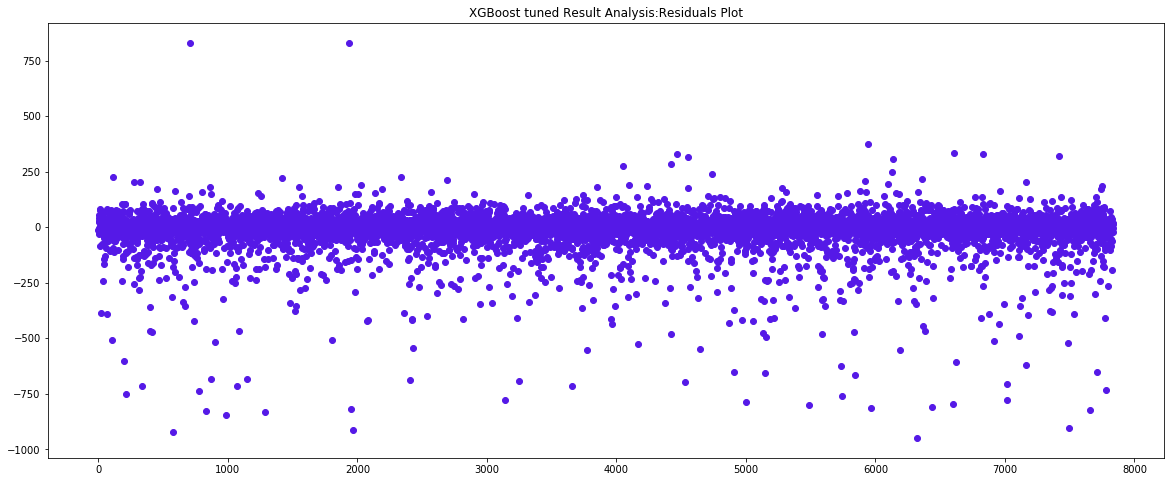

In [54]:
plt.figure(figsize=(20, 8))
plt.title('XGBoost tuned Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(my_pipeline_xgb_grid.predict(test_X))-np.expm1(test_y), color='#5519E7', label='residuals')


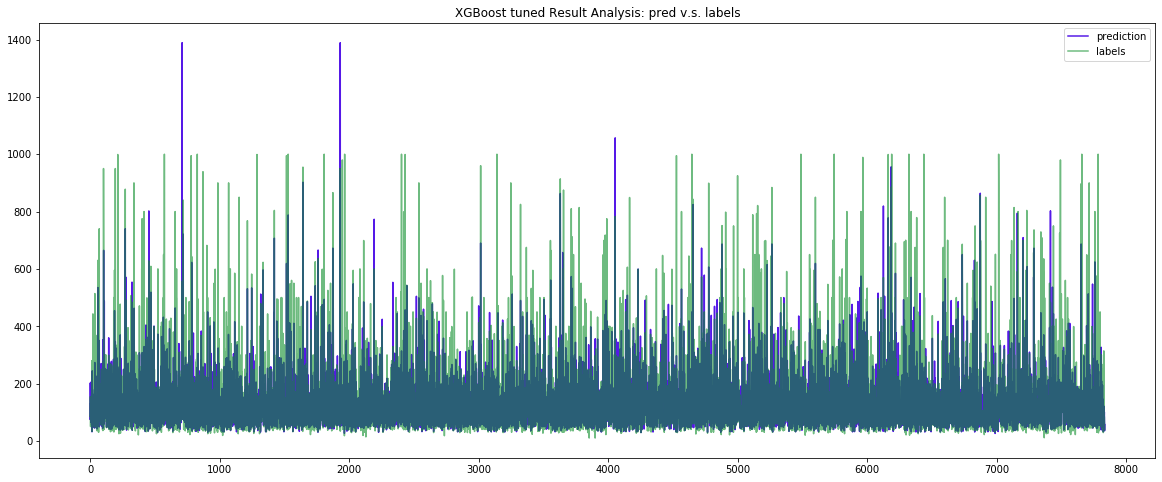

In [55]:
plt.figure(figsize=(20, 8))
plt.title('XGBoost tuned Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(my_pipeline_xgb_grid.predict(test_X)), color='#5519E7', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [56]:
with open('C:\\Users\\xiao\\Documents\\result_summary\\xgb\\my_pipeline_xgb_grid.pickle', 'wb') as f:
    pickle.dump(my_pipeline_xgb_grid, f)

In [62]:
# with open('C:\\Users\\xiao\\Documents\\result_summary\\xgb\\my_pipeline_xgb_grid.pickle', 'rb') as f:
#     RF_grid = pickle.load(f)

In [63]:
# evaluate_model(RF_grid, test_X, test_y)
# RF_grid.steps[2][1].feature_importances_

MAE: 0.2043
RMSE: 0.3776


In [58]:
del RF_grid
del my_pipeline_xgb_grid
del pipeline_xgb
del pipeline_RF
del my_pipeline_RF_grid

### GBDT

In [71]:
pipeline_gbdt = make_pipeline(SimpleImputer(), StandardScaler(), GradientBoostingRegressor(random_state=99))
pipeline_gbdt.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(pipeline_gbdt, test_X, test_y)
print('Validation for train data')
evaluate_model(pipeline_gbdt, train_X, train_y)

Evaluation for test data
MAE: 0.2365
RMSE: 0.4115
Validation for train data
MAE: 0.2405
RMSE: 0.3981


In [72]:
importances = pipeline_gbdt.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.to_csv('C:\\Users\\xiao\\Documents\\result_summary\\gbdt\\feature_importances_untuned.csv',index =False )

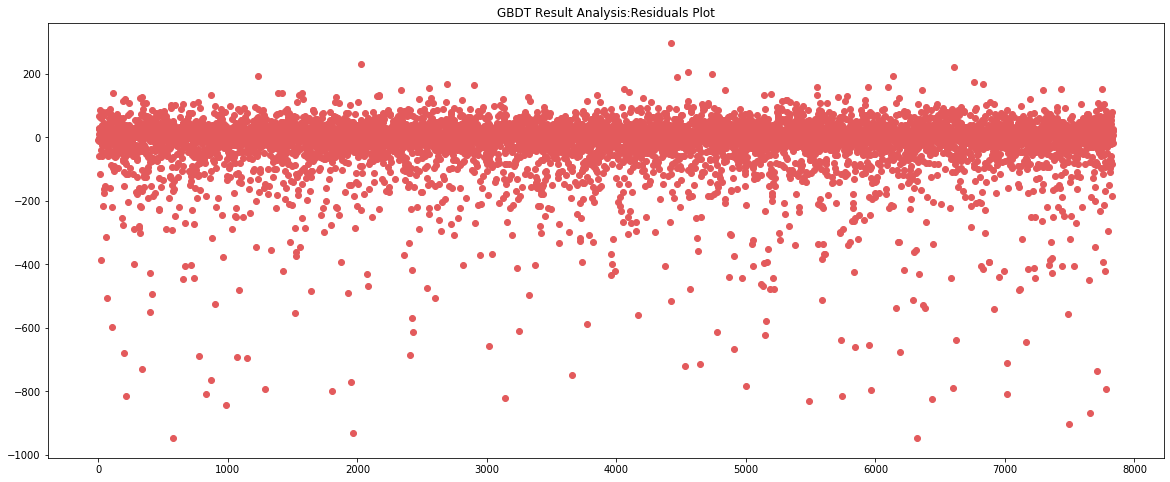

In [73]:
plt.figure(figsize=(20, 8))
plt.title('GBDT Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(pipeline_gbdt.predict(test_X))-np.expm1(test_y), color='#E35A5C', label='residuals')

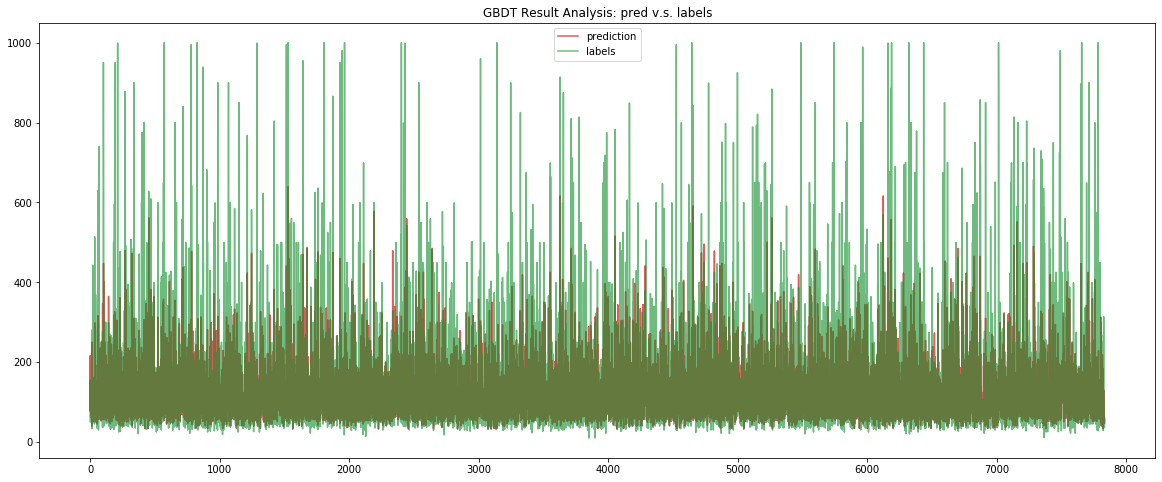

In [74]:
plt.figure(figsize=(20, 8))
plt.title('GBDT Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(pipeline_gbdt.predict(test_X)), color='#E35A5C', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [75]:
print('Parameters currently used:\n')
pprint(pipeline_gbdt.get_params())

Parameters currently used:

{'gradientboostingregressor': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=99, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False),
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'ls'

In [76]:
param_grid = {'gradientboostingregressor__learning_rate': [0.3,0.2, 0.1, 0.05, 0.01], 
              'gradientboostingregressor__max_depth': [3,6,9,12],
              'gradientboostingregressor__n_estimators': [50,100, 500, 1000]}

grid_search_gbdt = GridSearchCV(estimator = pipeline_gbdt,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 1, 
                           scoring = 'neg_root_mean_squared_error')

grid_search_gbdt.fit(train_X, train_y)
grid_search_gbdt.best_params_


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 34.4min finished


{'gradientboostingregressor__learning_rate': 0.2,
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__n_estimators': 1000}

In [94]:
my_pipeline_gbdt_grid = make_pipeline(SimpleImputer(), StandardScaler(),GradientBoostingRegressor(random_state=99,learning_rate = 0.2,max_depth=3,n_estimators=1000))
my_pipeline_gbdt_grid.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(my_pipeline_gbdt_grid, test_X, test_y)
print('Validation for train data')
evaluate_model(my_pipeline_gbdt_grid, train_X, train_y)

Evaluation for test data
MAE: 0.2028
RMSE: 0.3783
Validation for train data
MAE: 0.1811
RMSE: 0.3243


In [95]:
importances = my_pipeline_gbdt_grid.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.to_csv('C:\\Users\\xiao\\Documents\\result_summary\\gbdt\\feature_importances_tuned.csv',index =False )

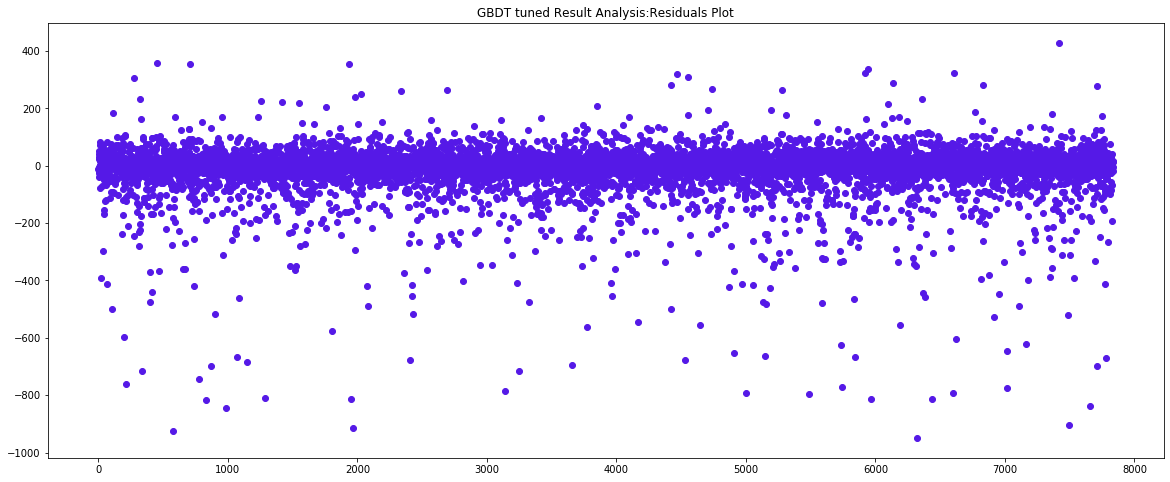

In [96]:
plt.figure(figsize=(20, 8))
plt.title('GBDT tuned Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(my_pipeline_gbdt_grid.predict(test_X))-np.expm1(test_y), color='#5519E7', label='residuals')


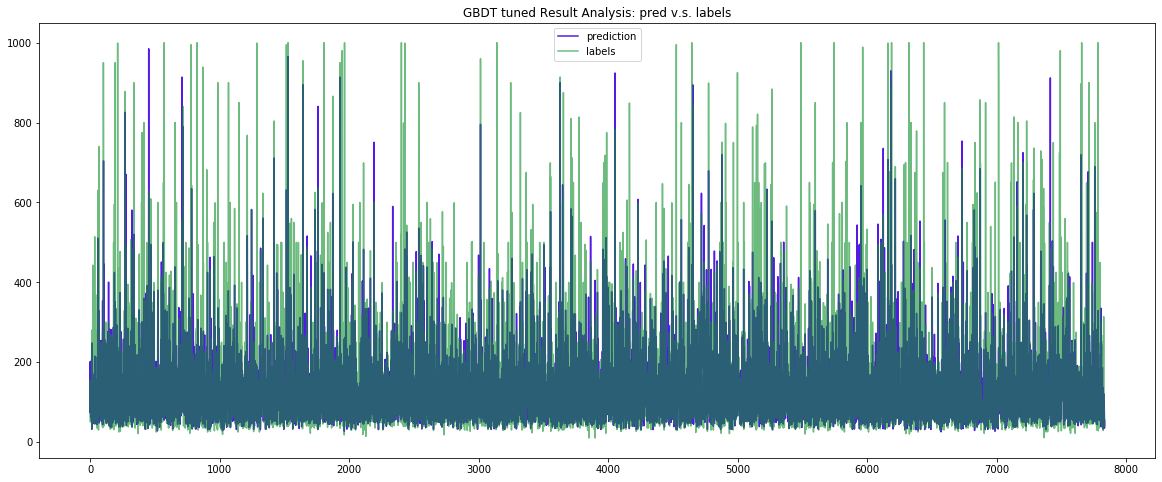

In [97]:
plt.figure(figsize=(20, 8))
plt.title('GBDT tuned Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(my_pipeline_gbdt_grid.predict(test_X)), color='#5519E7', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [85]:
with open('C:\\Users\\xiao\\Documents\\result_summary\\gbdt\\my_pipeline_gbdt_grid.pickle', 'wb') as f:
    pickle.dump(my_pipeline_gbdt_grid, f)

In [86]:
del pipeline_gbdt
del my_pipeline_gbdt_grid

### MLP

In [98]:
pipeline_mlp = make_pipeline(SimpleImputer(), StandardScaler(), MLPRegressor(random_state=99,max_iter=500))
pipeline_mlp.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(pipeline_mlp, test_X, test_y)
print('Validation for train data')
evaluate_model(pipeline_mlp, train_X, train_y)

Evaluation for test data
MAE: 0.2562
RMSE: 0.4485
Validation for train data
MAE: 0.2329
RMSE: 0.3897


In [99]:
pipeline_mlp.get_params()

{'memory': None,
 'steps': [('simpleimputer',
   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                 missing_values=nan, strategy='mean', verbose=0)),
  ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('mlpregressor',
   MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                beta_2=0.999, early_stopping=False, epsilon=1e-08,
                hidden_layer_sizes=(100,), learning_rate='constant',
                learning_rate_init=0.001, max_fun=15000, max_iter=500,
                momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                power_t=0.5, random_state=99, shuffle=True, solver='adam',
                tol=0.0001, validation_fraction=0.1, verbose=False,
                warm_start=False))],
 'verbose': False,
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'standardscale

In [103]:
param_grid = {
    'mlpregressor__activation': ['logistic', 'tanh'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__hidden_layer_sizes': [(100,), (100, 50), (100, 100),(50,)],
    'mlpregressor__learning_rate_init': [0.001, 0.0001,0.01],
}

grid_search_mlp = GridSearchCV(estimator = pipeline_mlp,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2,
                           scoring = 'neg_root_mean_squared_error')

grid_search_mlp.fit(train_X, train_y)
grid_search_mlp.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 11.2min finished


{'mlpregressor__activation': 'logistic',
 'mlpregressor__early_stopping': True,
 'mlpregressor__hidden_layer_sizes': (100,),
 'mlpregressor__learning_rate_init': 0.001,
 'mlpregressor__solver': 'adam'}

In [111]:
def get_index_positions(list_of_elems, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    index_pos_list = []
    index_pos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            index_pos = list_of_elems.index(element, index_pos)
            # Add the index position in list
            index_pos_list.append(index_pos)
            index_pos += 1
        except ValueError as e:
            break
    return index_pos_list

In [113]:
l1=list(np.expm1(pipeline_mlp.predict(test_X))>=1000)
get_index_positions(l1, True)

[183, 271, 1529, 3509, 3630, 4792, 6185, 6828]

In [115]:
pre=pipeline_mlp.predict(test_X)
p1 = np.delete(pre,get_index_positions(l1, True))
t1 = np.delete(test_y,get_index_positions(l1, True))

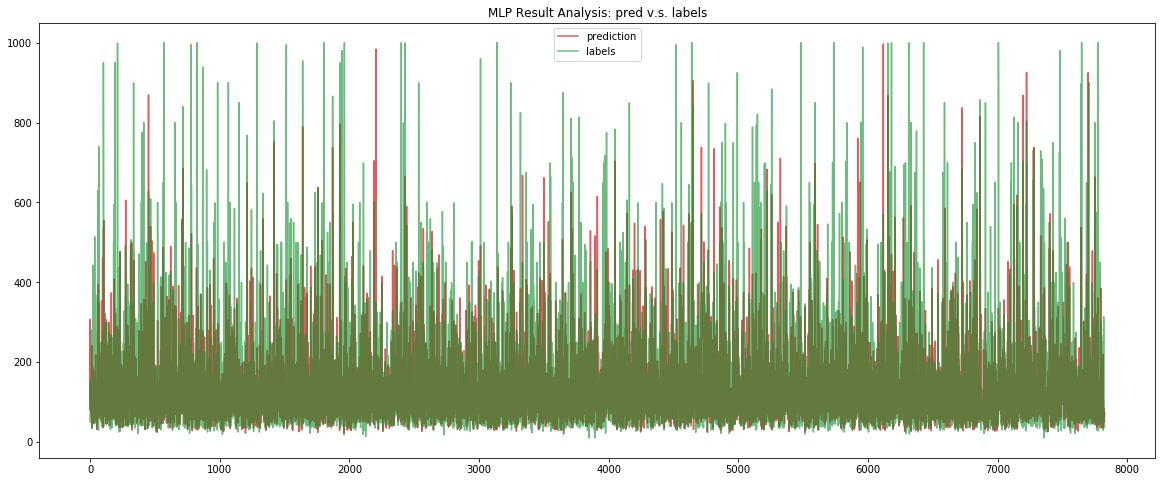

In [116]:
plt.figure(figsize=(20, 8))
plt.title('MLP Result Analysis: pred v.s. labels')
plt.plot(list(range(len(t1))),np.expm1(p1), color='#E35A5C', label='prediction')
plt.plot(list(range(len(t1))),np.expm1(t1), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

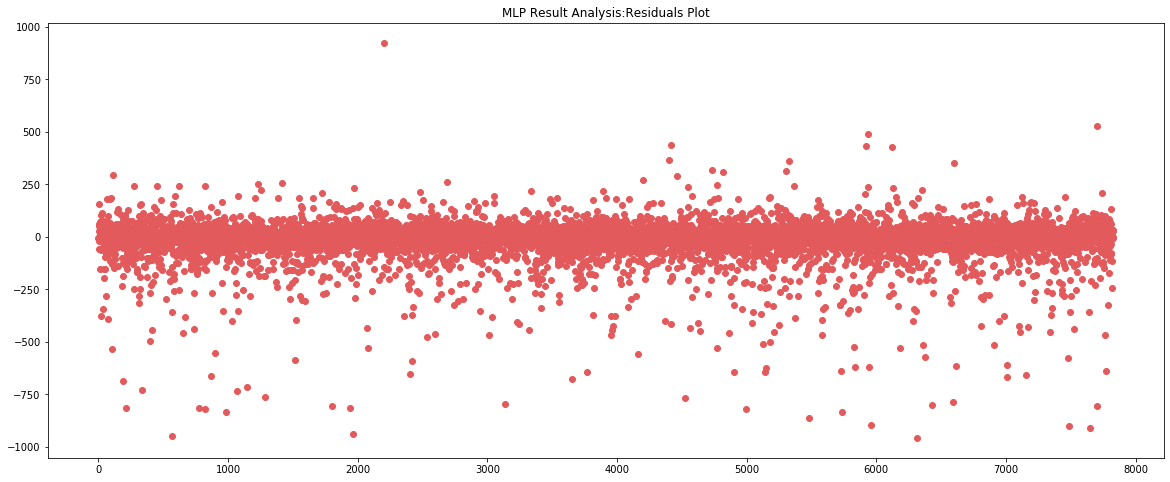

In [118]:
plt.figure(figsize=(20, 8))
plt.title('MLP Result Analysis:Residuals Plot')
plt.scatter(list(range(len(t1))),np.expm1(p1)-np.expm1(t1), color='#E35A5C', label='residuals')

In [121]:
my_pipeline_mlp_grid = make_pipeline(SimpleImputer(), StandardScaler(),MLPRegressor(random_state=99,max_iter=500,hidden_layer_sizes = (100,),
                                                 activation = 'logistic',
                                                 early_stopping = True,
                                                 learning_rate_init = 0.001,
                                                 solver = 'adam'))
my_pipeline_mlp_grid.fit(train_X, train_y)
print('Evaluation for test data')
evaluate_model(my_pipeline_mlp_grid, test_X, test_y)
print('Validation for train data')
evaluate_model(my_pipeline_mlp_grid, train_X, train_y)

Evaluation for test data
MAE: 0.2476
RMSE: 0.4312
Validation for train data
MAE: 0.2295
RMSE: 0.3922


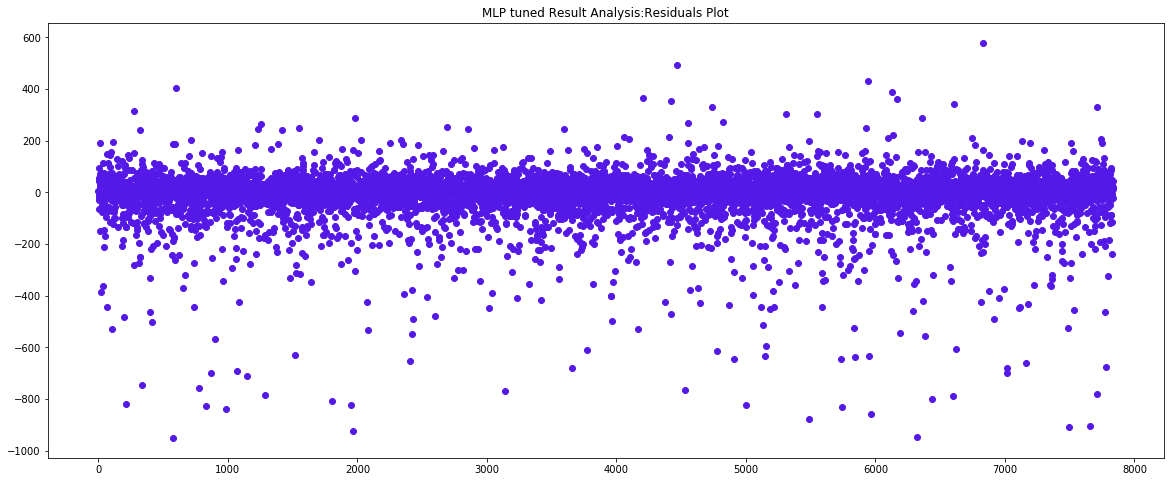

In [123]:
plt.figure(figsize=(20, 8))
plt.title('MLP tuned Result Analysis:Residuals Plot')
plt.scatter(list(range(len(test_y))),np.expm1(my_pipeline_mlp_grid.predict(test_X))-np.expm1(test_y), color='#5519E7', label='residuals')


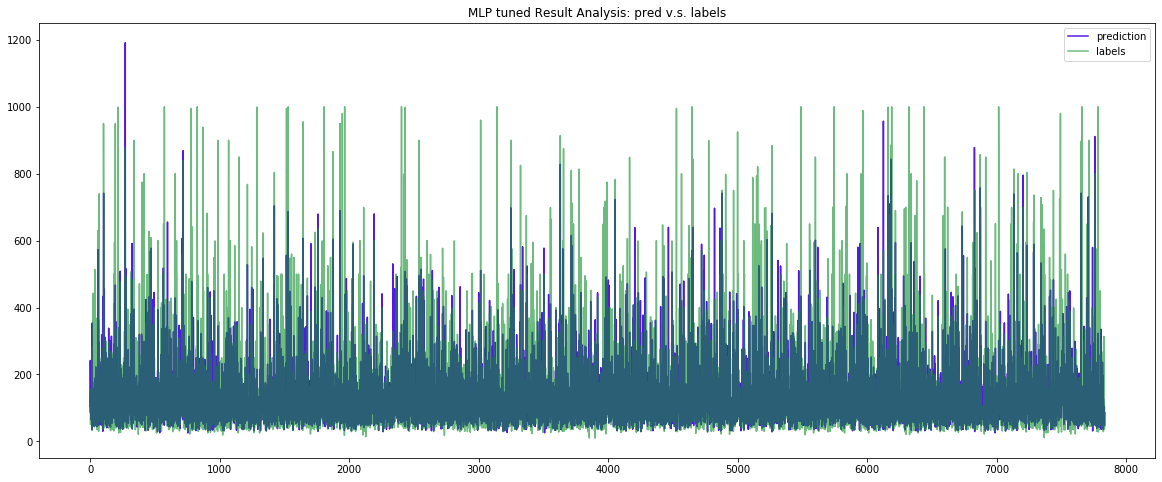

In [124]:
plt.figure(figsize=(20, 8))
plt.title('MLP tuned Result Analysis: pred v.s. labels')
plt.plot(list(range(len(test_y))),np.expm1(my_pipeline_mlp_grid.predict(test_X)), color='#5519E7', label='prediction')
plt.plot(list(range(len(test_y))),np.expm1(test_y), color='#0E8E2B', label='labels',alpha=0.6)
plt.legend() 

In [125]:
with open('C:\\Users\\xiao\\Documents\\result_summary\\mlp\\my_pipeline_mlp_grid.pickle', 'wb') as f:
    pickle.dump(my_pipeline_mlp_grid, f)